In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

# color-blind safe color scheme from https://personal.sron.nl/~pault/#fig:scheme_bright
blue, cyan, green, yellow = "#4477AA", "#66CCEE", "#228833", "#CCBB44"
red, purple, grey, black = "#EE6677", "#AA3377", "#BBBBBB", "#333333"

# 翻訳効率解析 by deltaTE
`DESeq2`を用いて翻訳効率を解析する`deltaTE`の結果を可視化。まず遺伝子発現の制御モードを区別する関数`regulation()`を作成。

In [11]:
def regulation(df):
    if df["gene"] in intensified:
        return "intensified"
    elif df["gene"] in forwarded:
        return "forwarded"
    elif df["gene"] in exclusive:
        return "exclusive"
    elif df["gene"] in buffered:
        return "buffered"
    else:
        return "ns"
    
def get_gene_name(df):
    return df["gene"].split("|")[0]

# データの読み込み
全リードを`df1`に、T>Cリードを`df2`に格納

In [12]:
read_type = "all"

path = "../rscript/deltaTE_v2/" + read_type + "/Results/gene_lists/"
input_total = "../rscript/deltaTE_v2/" + read_type + "/Results/fold_changes/deltaRNA.txt"
input_trap = "../rscript/deltaTE_v2/" + read_type + "/Results/fold_changes/deltaRibo.txt"

# set color and order
color = {"ns":grey, "forwarded":cyan, "buffered":purple, "exclusive":red, "intensified":blue}
plot_order = {"ns":0, "forwarded":1, "buffered":2, "exclusive":3, "intensified":4}
hue_order = ["intensified", "forwarded", "exclusive", "buffered", "ns"]

with open(path + "intensified.txt") as f:
    intensified = f.read().splitlines()
    
with open(path + "forwarded.txt") as f:
    forwarded = f.read().splitlines()

with open(path + "exclusive.txt") as f:
    exclusive = f.read().splitlines()
    
with open(path + "buffered.txt") as f:
    buffered = f.read().splitlines()
    
print(f"""# Regulation type
Intensified genes: {len(intensified)}
Forwarded genes: {len(forwarded)}
Exclusive genes: {len(exclusive)}
Buffered genes: {len(buffered)} """)

df_total = pd.read_csv(input_total, sep="\t")[["log2FoldChange", "padj"]]
df_trap = pd.read_csv(input_trap, sep="\t")[["log2FoldChange", "padj"]]
df = pd.merge(df_total, df_trap, left_index=True, right_index=True ).dropna()
df.columns = ["log2FC_total", "padj_total", "log2FC_trap", "padj_trap"]

df["gene"] = df.index
df["regulation"] = df.apply(regulation, axis=1)
df["gene_name"] =df.apply(get_gene_name, axis=1)

print(f"Analyzed genes: {len(df)}")

 # reorder df
df["plot_order"] = df["regulation"].map(plot_order)
df1 = df.sort_values("plot_order")

df1.to_csv("../results/tables//deltaTE_ReadCount.csv")

df1.head()

# Regulation type
Intensified genes: 25
Forwarded genes: 440
Exclusive genes: 132
Buffered genes: 57 
Analyzed genes: 8448


,log2FC_total,padj_total,log2FC_trap,padj_trap,gene,regulation,gene_name,plot_order
SAMD11|ENSG00000187634.13|chr1,0.184831,0.129807,0.091770,0.616788,SAMD11|ENSG00000187634.13|chr1,ns,SAMD11,0
EHD4|ENSG00000103966.11|chr15,-0.011607,0.968433,-0.130913,0.599364,EHD4|ENSG00000103966.11|chr15,ns,EHD4,0
JMJD7|ENSG00000243789.11|chr15,0.007758,0.972189,0.113964,0.571893,JMJD7|ENSG00000243789.11|chr15,ns,JMJD7,0
TYRO3|ENSG00000092445.12|chr15,-0.605731,0.022591,-0.331590,0.219338,TYRO3|ENSG00000092445.12|chr15,ns,TYRO3,0
RPAP1|ENSG00000103932.12|chr15,-0.121626,0.541254,0.065441,0.824621,RPAP1|ENSG00000103932.12|chr15,ns,RPAP1,0


In [13]:
read_type = "tc"

path = "../rscript/deltaTE_v2/" + read_type + "/Results/gene_lists/"
input_total = "../rscript/deltaTE_v2/" + read_type + "/Results/fold_changes/deltaRNA.txt"
input_trap = "../rscript/deltaTE_v2/" + read_type + "/Results/fold_changes/deltaRibo.txt"

# set color and order
color = {"ns":grey, "forwarded":cyan, "buffered":purple, "exclusive":red, "intensified":blue}
plot_order = {"ns":0, "forwarded":1, "buffered":2, "exclusive":3, "intensified":4}
hue_order = ["intensified", "forwarded", "exclusive", "buffered", "ns"]

with open(path + "intensified.txt") as f:
    intensified = f.read().splitlines()
    
with open(path + "forwarded.txt") as f:
    forwarded = f.read().splitlines()

with open(path + "exclusive.txt") as f:
    exclusive = f.read().splitlines()
    
with open(path + "buffered.txt") as f:
    buffered = f.read().splitlines()
    
print(f"""# Regulation type
Intensified genes: {len(intensified)}
Forwarded genes: {len(forwarded)}
Exclusive genes: {len(exclusive)}
Buffered genes: {len(buffered)} """)

df_total = pd.read_csv(input_total, sep="\t")[["log2FoldChange", "padj"]]
df_trap = pd.read_csv(input_trap, sep="\t")[["log2FoldChange", "padj"]]
df = pd.merge(df_total, df_trap, left_index=True, right_index=True ).dropna()
df.columns = ["log2FC_total", "padj_total", "log2FC_trap", "padj_trap"]

df["gene"] = df.index
df["regulation"] = df.apply(regulation, axis=1)
df["gene_name"] =df.apply(get_gene_name, axis=1)

print(f"Analyzed genes: {len(df)}")

 # reorder df
df["plot_order"] = df["regulation"].map(plot_order)
df2 = df.sort_values("plot_order")

df2.to_csv("../results/tables/deltaTE_TcReadCount.csv")

df2.head()

# Regulation type
Intensified genes: 7
Forwarded genes: 215
Exclusive genes: 154
Buffered genes: 8 
Analyzed genes: 8458


,log2FC_total,padj_total,log2FC_trap,padj_trap,gene,regulation,gene_name,plot_order
SAMD11|ENSG00000187634.13|chr1,-0.000823,0.996311,-0.010419,0.970852,SAMD11|ENSG00000187634.13|chr1,ns,SAMD11,0
CEP170B|ENSG00000099814.17|chr14,-0.196057,0.557051,-0.054052,0.872261,CEP170B|ENSG00000099814.17|chr14,ns,CEP170B,0
AKT1|ENSG00000142208.18|chr14,-0.079525,0.842864,-1.077443,0.005881,AKT1|ENSG00000142208.18|chr14,ns,AKT1,0
SIVA1|ENSG00000184990.13|chr14,-0.011415,0.981643,-0.230950,0.315248,SIVA1|ENSG00000184990.13|chr14,ns,SIVA1,0
KIF26A|ENSG00000066735.16|chr14,-0.088171,0.793678,-0.057715,0.873702,KIF26A|ENSG00000066735.16|chr14,ns,KIF26A,0


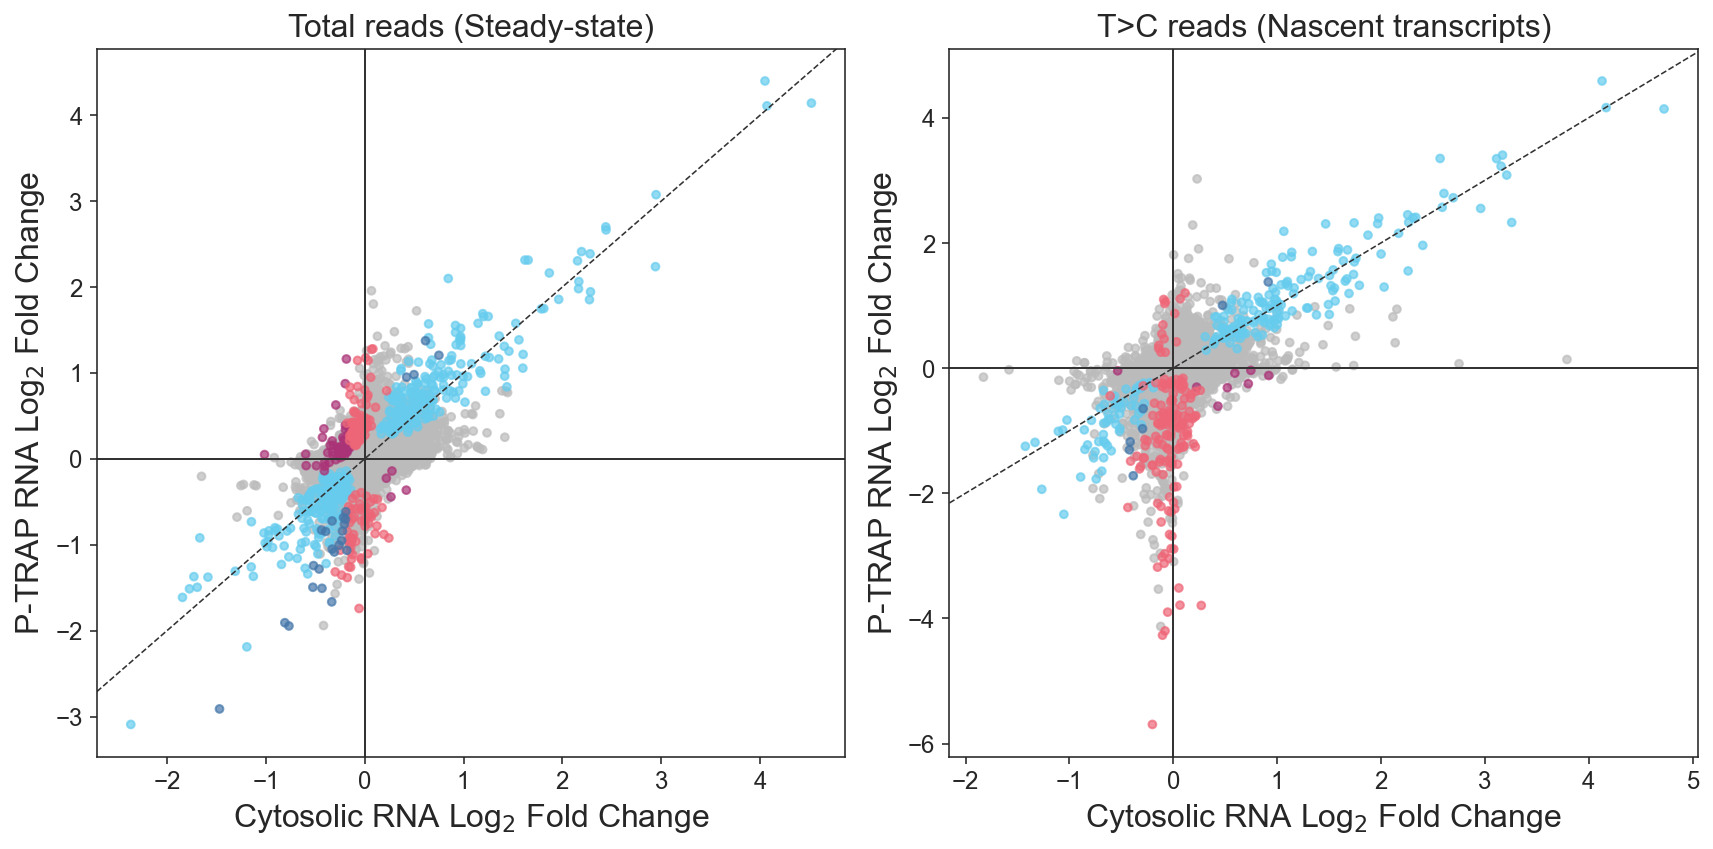

In [5]:
# subplot
sns.set_style("ticks")
fig = plt.figure(figsize=(12, 6), tight_layout=True)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# set color and order
color = {"ns":grey, "forwarded":cyan, "buffered":purple, "exclusive":red, "intensified":blue}

# plot scatters
for i in range(0, 5):
    ax1.scatter(df1[df1["plot_order"] == i]["log2FC_total"], df1[df1["plot_order"] == i]["log2FC_trap"],  color=df1[df1["plot_order"] == i]["regulation"].map(color), alpha=0.7, s=15)
    ax2.scatter(df2[df2["plot_order"] == i]["log2FC_total"], df2[df2["plot_order"] == i]["log2FC_trap"],  color=df2[df2["plot_order"] == i]["regulation"].map(color), alpha=0.7, s=15)

for ax in (ax1, ax2):
    x = y = list(ax.get_xlim())
    ax.plot(x, y, linestyle="--", color=black, lw=0.8, scalex=False, scaley=False)

    ax.axhline(0, -40, 40, color=black, linewidth=1)
    ax.axvline(0, -40, 40, color=black, linewidth=1)
    ax.tick_params(direction="out", labelsize=12)
    ax.set_xlabel("Cytosolic RNA Log" + "$_{2}$" + " Fold Change", fontsize=16)
    ax.set_ylabel("P-TRAP RNA Log" + "$_{2}$" + " Fold Change", fontsize=16)

ax1.set_title("Total reads (Steady-state)", fontsize=16)
ax2.set_title("T>C reads (Nascent transcripts)", fontsize=16)

fig.savefig("../results/figure_7/DeltaTE_Scatterplot.pdf", bbox_inches="tight", transparent=True)

## 新規合成RNAの割合

In [21]:
allreads = pd.read_csv("../slamdunk/csv/allreads.csv", index_col=["Name", "Chromosome", "Start", "End", "Length", "Strand"])
tcreads = pd.read_csv("../slamdunk/csv/tcreads.csv",index_col=["Name", "Chromosome", "Start", "End", "Length", "Strand"])

sample_name = allreads.columns.values
print(sample_name)

df = pd.merge(allreads, tcreads, left_index=True, right_index=True)
df.head()

['DRR438599' 'DRR438600' 'DRR438601' 'DRR438602' 'DRR438603' 'DRR438604'
 'DRR438605' 'DRR438606' 'DRR438607' 'DRR438608' 'DRR438609' 'DRR438610'
 'DRR438611' 'DRR438612' 'DRR438613' 'DRR438614' 'DRR438615' 'DRR438616']


,,,,,,DRR438599_x,DRR438600_x,DRR438601_x,DRR438602_x,DRR438603_x,DRR438604_x,DRR438605_x,DRR438606_x,DRR438607_x,DRR438608_x,...,DRR438607_y,DRR438608_y,DRR438609_y,DRR438610_y,DRR438611_y,DRR438612_y,DRR438613_y,DRR438614_y,DRR438615_y,DRR438616_y
Name,Chromosome,Start,End,Length,Strand,,,,,,,,,,,,,,,,,,,,,
OR4F5|ENSG00000186092.7,chr1,70009,71585,1576,+,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAMD11|ENSG00000187634.13,chr1,944154,944574,420,+,1626,1174,1282,1792,1673,1543,2024,2362,1872,2294,...,730,693,608,581,728,210,702,413,293,310
NOC2L|ENSG00000188976.11,chr1,944203,944693,490,-,1354,1074,1091,1177,1088,1051,1146,1738,1344,2452,...,103,235,207,128,180,96,139,222,124,110
KLHL17|ENSG00000187961.15,chr1,965192,965719,527,+,94,45,77,125,117,144,77,77,76,75,...,16,1,0,0,6,6,14,3,3,2
PLEKHN1|ENSG00000187583.11,chr1,974576,975865,1289,+,11,10,13,4,0,2,0,4,0,14,...,0,0,0,0,0,0,0,16,3,0


T>C変換が生じたリードの割合を計算するにあたり、発現量が低い遺伝子を含めるとバラつきが大きくなるため、低発現の遺伝子を除外するべきだと考えた。**とりあえずリード数が0のサンプルが1つでもあればその遺伝子を除外する。これは`SLAM-DUNK`でT>C 変換率を求めるときと同じ基準**。

In [22]:
df["low"] = df.apply(lambda s: (s == 0).sum(), axis=1)
df = df[df["low"] == 0]

print(len(df))

8481


リード数が0のサンプルが1つでもある遺伝子を除外した結果 8,481 遺伝子が残った。次にT>C変換リード数を全リード数で割り算して、全リード中に占めるT>Cリードの割合 (T>C ratio) を求める。それぞれ同じサンプルの中でT>Cリードと全リードがあるので、正規化は必要なし。

In [23]:
allreads = df.filter(regex="_x", axis=1)
tcreads = df.filter(regex="_y", axis=1)

protocol = ["Total-DMSO"] * 3 + ["Total-TPG"] * 3 + ["P0-DMSO"] * 3 + ["P0-TPG"] * 3 + ["L10a-DMSO"] * 3 + ["L10a-TPG"] * 3

allreads.columns = protocol 
tcreads.columns = protocol 

tcratio = tcreads / allreads

tcratio.head()

,,,,,,Total-DMSO,Total-DMSO,Total-DMSO,Total-TPG,Total-TPG,Total-TPG,P0-DMSO,P0-DMSO,P0-DMSO,P0-TPG,P0-TPG,P0-TPG,L10a-DMSO,L10a-DMSO,L10a-DMSO,L10a-TPG,L10a-TPG,L10a-TPG
Name,Chromosome,Start,End,Length,Strand,,,,,,,,,,,,,,,,,,
SAMD11|ENSG00000187634.13,chr1,944154,944574,420,+,0.335178,0.337308,0.354134,0.267857,0.341901,0.278678,0.336957,0.342506,0.389957,0.302092,0.291887,0.397129,0.417910,0.292887,0.342773,0.256522,0.228016,0.255987
NOC2L|ENSG00000188976.11,chr1,944203,944693,490,-,0.121123,0.093110,0.184235,0.109601,0.102022,0.125595,0.062827,0.090909,0.076637,0.095840,0.135827,0.118628,0.112080,0.132231,0.105864,0.154167,0.102310,0.104265
HES4|ENSG00000188290.11,chr1,998964,999058,94,-,0.177603,0.188098,0.182272,0.203187,0.201599,0.189906,0.132178,0.171800,0.171394,0.106564,0.130290,0.147186,0.157895,0.107517,0.155462,0.224054,0.118140,0.121383
SDF4|ENSG00000078808.20,chr1,1216931,1217511,580,-,0.202243,0.167329,0.197689,0.188808,0.200510,0.234855,0.202816,0.179676,0.177194,0.200479,0.274443,0.144031,0.211834,0.184728,0.171275,0.224100,0.192569,0.195956
B3GALT6|ENSG00000176022.7,chr1,1233269,1235041,1772,+,0.630419,0.575238,0.522172,0.621942,0.639266,0.655711,0.699608,0.646035,0.621912,0.691248,0.662728,0.681034,0.627864,0.627317,0.656689,0.651978,0.627329,0.657513


↑で求めた T>C ratio は各 replicate の値なので平均値を求める。

In [24]:
Total_DMSO = tcratio.filter(regex="Total-DMSO", axis=1).mean(axis=1)
Total_TPG = tcratio.filter(regex="Total-TPG", axis=1).mean(axis=1)

P0_DMSO = tcratio.filter(regex="P0-DMSO", axis=1).mean(axis=1)
P0_TPG = tcratio.filter(regex="P0-TPG", axis=1).mean(axis=1)

L10a_DMSO = tcratio.filter(regex="L10a-DMSO", axis=1).mean(axis=1)
L10a_TPG = tcratio.filter(regex="L10a-TPG", axis=1).mean(axis=1)

### Boxplot で新規合成RNAの割合を比較
新規合成RNAの割合が transcriptome と translatome で異なっているかどうか boxplot で可視化してみる。

WMW test (RNA DMSO vs P0 DMSO): 0.0159145456
WMW test (RNA TPG vs P0 TPG): 0.0
WMW test (P0 DMSO vs P0 TPG): 0.0


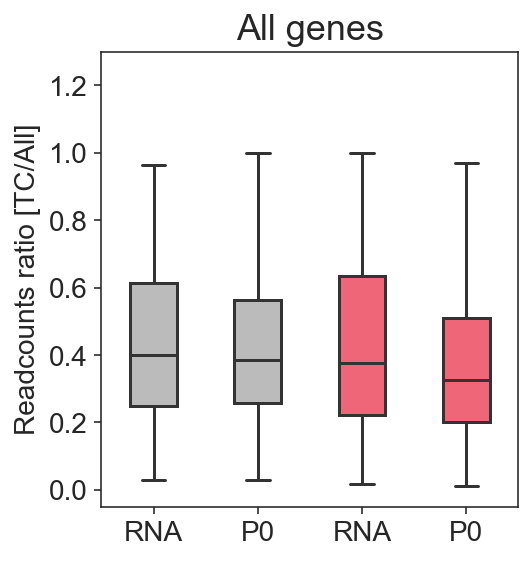

In [25]:
fig = plt.figure(figsize=(3.8, 4), tight_layout=True)
ax = fig.add_subplot(1, 1, 1)

ax.tick_params(direction="out", labelsize=14)
ax.set_ylabel("Readcounts ratio [TC/All]", fontsize=14)
ax.set_title("All genes", fontsize=18)
ax.set_ylim(-0.05, 1.3)

TD, TT = Total_DMSO.values, Total_TPG.values
PD, PT = P0_DMSO.values, P0_TPG.values
LD, LT = L10a_DMSO.values, L10a_TPG.values

bp = ax.boxplot([TD, TT, PD, PT], labels=["RNA", "P0", "RNA", "P0"], 
                    sym="",                                                                                                                 # 外れ値を表示しない
                    patch_artist=True,                                                                                              # 細かい設定をするモード
                    boxprops=dict(facecolor=grey, color=black, linewidth=1.5),                      # boxの枠線の設定
                    medianprops=dict(color=black, linewidth=1.5),                                                 # 中央値の線の設定
                    whiskerprops=dict(color=black, linewidth=1.5),                                                # ヒゲの線の設定
                    capprops=dict(color=black, linewidth=1.5)                                                        # ヒゲの先端の線の設定
                    );

colors = [grey, grey, red, red]
for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)
    
bp

pvalue1 = round(stats.mannwhitneyu(TD, PD, alternative="two-sided").pvalue, 10)
pvalue2 = round(stats.mannwhitneyu(TT, PT, alternative="two-sided").pvalue, 10)
pvalue3 = round(stats.mannwhitneyu(PD, PT, alternative="two-sided").pvalue, 10)    
print(f"WMW test (RNA DMSO vs P0 DMSO): {pvalue1}")
print(f"WMW test (RNA TPG vs P0 TPG): {pvalue2}")
print(f"WMW test (P0 DMSO vs P0 TPG): {pvalue3}")

fig.savefig("../results/figure_7/BoxPlot_ReadCount_CountBase.pdf", bbox_inches="tight", transparent=True)

ORF の長さに依存した制御は存在するのか？

In [26]:
orf = pd.read_csv("../slamdunk/bed/gencode.v41.orf.length.tsv", sep="\t", index_col="ID")
orf.head()

tcratio["ID"] = tcratio.index.get_level_values(0) + "|" + tcratio.index.get_level_values(1)
tcratio.index = tcratio["ID"] 

tcratio = pd.merge(tcratio, orf, left_index=True, right_index=True, how="inner")
tcratio.head()

,Total-DMSO,Total-DMSO,Total-DMSO,Total-TPG,Total-TPG,Total-TPG,P0-DMSO,P0-DMSO,P0-DMSO,P0-TPG,P0-TPG,P0-TPG,L10a-DMSO,L10a-DMSO,L10a-DMSO,L10a-TPG,L10a-TPG,L10a-TPG,ID,length
ID,,,,,,,,,,,,,,,,,,,,
SAMD11|ENSG00000187634.13|chr1,0.335178,0.337308,0.354134,0.267857,0.341901,0.278678,0.336957,0.342506,0.389957,0.302092,0.291887,0.397129,0.417910,0.292887,0.342773,0.256522,0.228016,0.255987,SAMD11|ENSG00000187634.13|chr1,2535
NOC2L|ENSG00000188976.11|chr1,0.121123,0.093110,0.184235,0.109601,0.102022,0.125595,0.062827,0.090909,0.076637,0.095840,0.135827,0.118628,0.112080,0.132231,0.105864,0.154167,0.102310,0.104265,NOC2L|ENSG00000188976.11|chr1,2250
HES4|ENSG00000188290.11|chr1,0.177603,0.188098,0.182272,0.203187,0.201599,0.189906,0.132178,0.171800,0.171394,0.106564,0.130290,0.147186,0.157895,0.107517,0.155462,0.224054,0.118140,0.121383,HES4|ENSG00000188290.11|chr1,666
SDF4|ENSG00000078808.20|chr1,0.202243,0.167329,0.197689,0.188808,0.200510,0.234855,0.202816,0.179676,0.177194,0.200479,0.274443,0.144031,0.211834,0.184728,0.171275,0.224100,0.192569,0.195956,SDF4|ENSG00000078808.20|chr1,1068
B3GALT6|ENSG00000176022.7|chr1,0.630419,0.575238,0.522172,0.621942,0.639266,0.655711,0.699608,0.646035,0.621912,0.691248,0.662728,0.681034,0.627864,0.627317,0.656689,0.651978,0.627329,0.657513,B3GALT6|ENSG00000176022.7|chr1,990


---
WMW test (RNA DMSO vs P0 DMSO): 0.2486930574
WMW test (RNA TPG vs P0 TPG): 0.0007844217
WMW test (P0 DMSO vs P0 TPG): 0.4564701259
---
WMW test (RNA DMSO vs P0 DMSO): 0.1557298303
WMW test (RNA TPG vs P0 TPG): 0.0
WMW test (P0 DMSO vs P0 TPG): 0.0
---
WMW test (RNA DMSO vs P0 DMSO): 0.2575288037
WMW test (RNA TPG vs P0 TPG): 0.0
WMW test (P0 DMSO vs P0 TPG): 0.0
---
WMW test (RNA DMSO vs P0 DMSO): 0.219936271
WMW test (RNA TPG vs P0 TPG): 0.0
WMW test (P0 DMSO vs P0 TPG): 3.22e-08


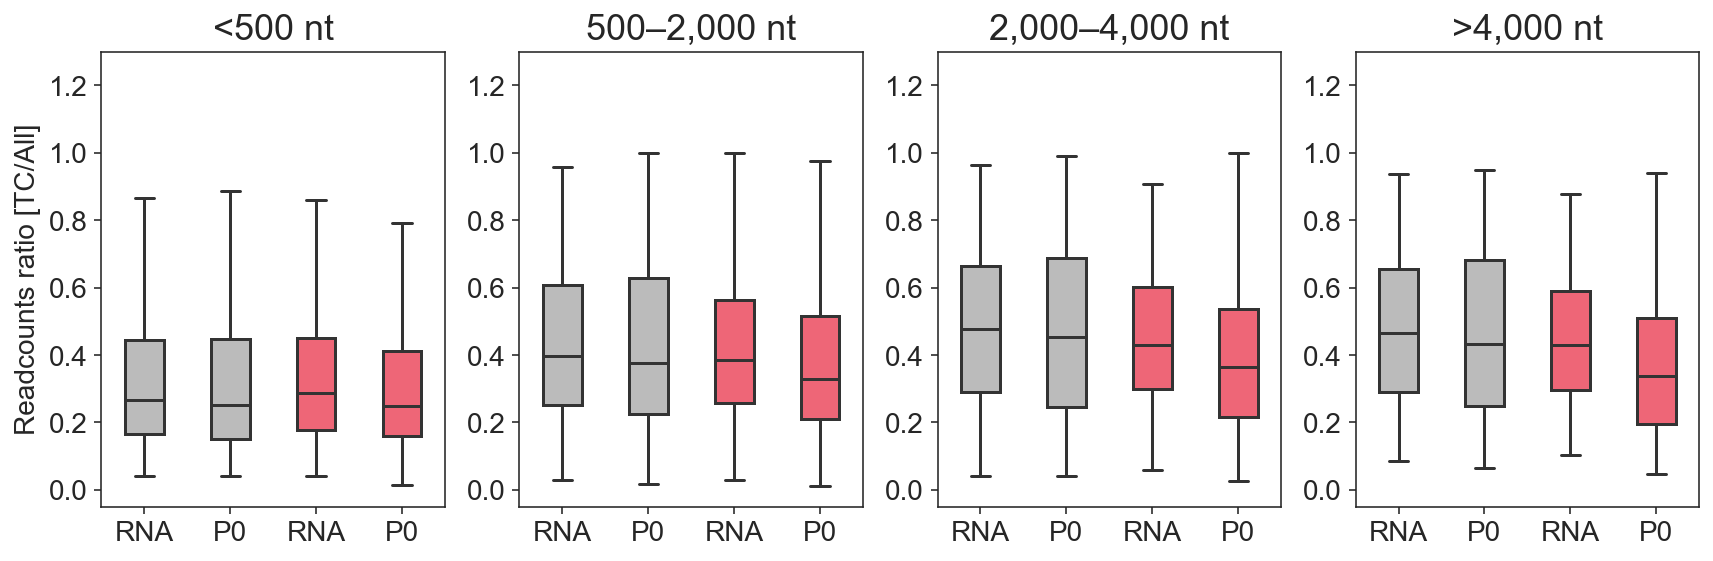

In [27]:
tmp = tcratio.copy()

df1 = tmp[tmp["length"] < 500]
df2 = tmp[(tmp["length"] >= 500) & (tmp["length"] < 2000)]
df3 = tmp[(tmp["length"] >= 2000) & (tmp["length"] < 4000)]
df4 = tmp[tmp["length"] >= 4000]

fig = plt.figure(figsize=(12, 4), tight_layout=True)
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.set_ylabel("Readcounts ratio [TC/All]", fontsize=14)
ax1.set_title("<500 nt", fontsize=18)
ax2.set_title("500–2,000 nt", fontsize=18)
ax3.set_title("2,000–4,000 nt", fontsize=18)
ax4.set_title(">4,000 nt", fontsize=18)

for df, ax in zip((df1, df2, df3, df4), (ax1, ax2, ax3, ax4)):
    Total_DMSO = df.filter(regex="Total-DMSO", axis=1).mean(axis=1)
    Total_TPG = df.filter(regex="Total-TPG", axis=1).mean(axis=1)
    P0_DMSO = df.filter(regex="P0-DMSO", axis=1).mean(axis=1)
    P0_TPG = df.filter(regex="P0-TPG", axis=1).mean(axis=1)
    L10a_DMSO = df.filter(regex="L10a-DMSO", axis=1).mean(axis=1)
    L10a_TPG = df.filter(regex="L10a-TPG", axis=1).mean(axis=1)
    
    TD, TT = Total_DMSO.values, Total_TPG.values
    PD, PT = P0_DMSO.values, P0_TPG.values
    LD, LT = L10a_DMSO.values, L10a_TPG.values

    ax.tick_params(direction="out", labelsize=14)
    ax.set_ylim(-0.05, 1.3)

    bp =ax.boxplot([TD, PD, TT, PT], labels=["RNA", "P0", "RNA", "P0"], 
                        sym="",                                                                                                                 # 外れ値を表示しない
                        patch_artist=True,                                                                                              # 細かい設定をするモード
                        boxprops=dict(facecolor=grey, color=black, linewidth=1.5),                       # boxの枠線の設定
                        medianprops=dict(color=black, linewidth=1.5),                                                 # 中央値の線の設定
                        whiskerprops=dict(color=black, linewidth=1.5),                                                # ヒゲの線の設定
                        capprops=dict(color=black, linewidth=1.5)                                                        # ヒゲの先端の線の設定
                        );
    
    colors = [grey, grey, red, red]
    for patch, color in zip(bp["boxes"], colors):
        patch.set_facecolor(color)
    
    bp
    
    pvalue1 = round(stats.mannwhitneyu(TD, PD, alternative="two-sided").pvalue, 10)
    pvalue2 = round(stats.mannwhitneyu(TT, PT, alternative="two-sided").pvalue, 10)
    pvalue3 = round(stats.mannwhitneyu(PD, PT, alternative="two-sided").pvalue, 10)
    
    print("---")
    print(f"WMW test (RNA DMSO vs P0 DMSO): {pvalue1}")
    print(f"WMW test (RNA TPG vs P0 TPG): {pvalue2}")
    print(f"WMW test (P0 DMSO vs P0 TPG): {pvalue3}")
    
fig.savefig("../results/figure_7/BoxPlot_ReadCount_ORFlength_CountBase.pdf", bbox_inches="tight", transparent=True)

ORFの長さによって transcriptome (RNA-seq) または translatome (P-TRAP-seq) に含まれる新生RNAの割合が変化していた。定常状態 (非ストレス) では transcriptome と translatome に含まれる新生 RNA の割合に有意な差が見られなかった。これは nRibo-seq で見られていたものと結果が異なるが、nRibo-seq の実験では 4sU 標識後 40 min という RLT の速い段階 (ラグが大きい段階) で解析を行っているが、我々の解析は 4sU 標識後 180 min 経過しているため、ラグが小さくなっているため異なる結果なのかもしれない。一方で ER ストレス状態では、transcriptome と translatome 間の新生 RNA の割合が有意に低下しており、全体として翻訳が抑制されている様子が見られる。また nRibo-seq で見られていた ORF の大きさに依存したリボソームローディングのラグが観察された。ER ストレス状態ではリボソームが RNA にロードされる速度が低下していることがわかる。

### deltaTE 解析で翻訳が抑制されていない遺伝子とそうでない遺伝子について新規合成RNAの割合を求めてみる。

In [28]:
deltaTE = pd.read_csv("../results/tables/deltaTE_TcReadCount.csv", index_col="gene")
deltaTE = deltaTE[["log2FC_trap", "regulation"]]

tcratio = pd.merge(tcratio, deltaTE, left_index=True, right_index=True, how="inner")
tcratio.head()

,Total-DMSO,Total-DMSO,Total-DMSO,Total-TPG,Total-TPG,Total-TPG,P0-DMSO,P0-DMSO,P0-DMSO,P0-TPG,...,L10a-DMSO,L10a-DMSO,L10a-DMSO,L10a-TPG,L10a-TPG,L10a-TPG,ID,length,log2FC_trap,regulation
SAMD11|ENSG00000187634.13|chr1,0.335178,0.337308,0.354134,0.267857,0.341901,0.278678,0.336957,0.342506,0.389957,0.302092,...,0.417910,0.292887,0.342773,0.256522,0.228016,0.255987,SAMD11|ENSG00000187634.13|chr1,2535,-0.010419,ns
NOC2L|ENSG00000188976.11|chr1,0.121123,0.093110,0.184235,0.109601,0.102022,0.125595,0.062827,0.090909,0.076637,0.095840,...,0.112080,0.132231,0.105864,0.154167,0.102310,0.104265,NOC2L|ENSG00000188976.11|chr1,2250,0.830940,ns
HES4|ENSG00000188290.11|chr1,0.177603,0.188098,0.182272,0.203187,0.201599,0.189906,0.132178,0.171800,0.171394,0.106564,...,0.157895,0.107517,0.155462,0.224054,0.118140,0.121383,HES4|ENSG00000188290.11|chr1,666,-0.809218,exclusive
SDF4|ENSG00000078808.20|chr1,0.202243,0.167329,0.197689,0.188808,0.200510,0.234855,0.202816,0.179676,0.177194,0.200479,...,0.211834,0.184728,0.171275,0.224100,0.192569,0.195956,SDF4|ENSG00000078808.20|chr1,1068,-0.074152,ns
B3GALT6|ENSG00000176022.7|chr1,0.630419,0.575238,0.522172,0.621942,0.639266,0.655711,0.699608,0.646035,0.621912,0.691248,...,0.627864,0.627317,0.656689,0.651978,0.627329,0.657513,B3GALT6|ENSG00000176022.7|chr1,990,-0.045612,ns


---
WMW test (RNA DMSO vs P0 DMSO): 0.4139592624
WMW test (RNA TPG vs P0 TPG): 0.551502169
WMW test (P0 DMSO vs P0 TPG): 0.0118557577
---
WMW test (RNA DMSO vs P0 DMSO): 0.370975311
WMW test (RNA TPG vs P0 TPG): 7.7043e-06
WMW test (P0 DMSO vs P0 TPG): 2.96e-08


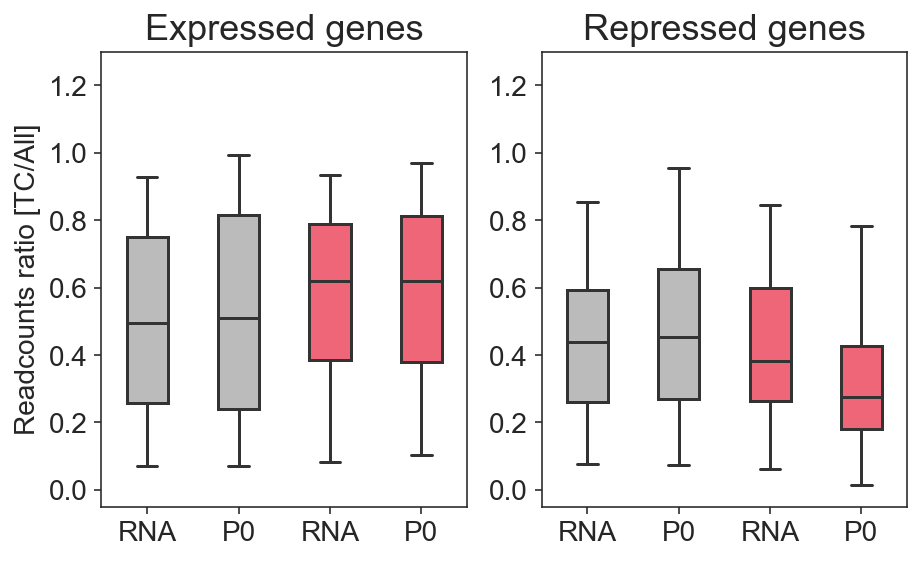

In [29]:
tmp = tcratio.copy()
tmp = tmp[(tmp["regulation"] == "forwarded") | (tmp["regulation"] == "intensified") | (tmp["regulation"] == "exclusive")]
df1= tmp[tmp["log2FC_trap"] > 0]
df2= tmp[tmp["log2FC_trap"] < 0]

fig = plt.figure(figsize=(6.5, 4), tight_layout=True)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

for df, ax in zip((df1, df2), (ax1, ax2)):
    Total_DMSO = df.filter(regex="Total-DMSO", axis=1).mean(axis=1)
    Total_TPG = df.filter(regex="Total-TPG", axis=1).mean(axis=1)
    P0_DMSO = df.filter(regex="P0-DMSO", axis=1).mean(axis=1)
    P0_TPG = df.filter(regex="P0-TPG", axis=1).mean(axis=1)
    L10a_DMSO = df.filter(regex="L10a-DMSO", axis=1).mean(axis=1)
    L10a_TPG = df.filter(regex="L10a-TPG", axis=1).mean(axis=1)
    
    TD, TT = Total_DMSO.values, Total_TPG.values
    PD, PT = P0_DMSO.values, P0_TPG.values
    LD, LT = L10a_DMSO.values, L10a_TPG.values

    ax.tick_params(direction="out", labelsize=14)
    ax.set_ylim(-0.05, 1.3)

    bp =ax.boxplot([TD, PD, TT, PT], labels=["RNA", "P0", "RNA", "P0"], 
                        sym="",                                                                                                                 # 外れ値を表示しない
                        patch_artist=True,                                                                                              # 細かい設定をするモード
                        boxprops=dict(facecolor=grey, color=black, linewidth=1.5),                       # boxの枠線の設定
                        medianprops=dict(color=black, linewidth=1.5),                                                 # 中央値の線の設定
                        whiskerprops=dict(color=black, linewidth=1.5),                                                # ヒゲの線の設定
                        capprops=dict(color=black, linewidth=1.5)                                                        # ヒゲの先端の線の設定
                        );
    
    colors = [grey, grey, red, red]
    for patch, color in zip(bp["boxes"], colors):
        patch.set_facecolor(color)
    
    bp
    
    pvalue1 = round(stats.mannwhitneyu(TD, PD, alternative="two-sided").pvalue, 10)
    pvalue2 = round(stats.mannwhitneyu(TT, PT, alternative="two-sided").pvalue, 10)
    pvalue3 = round(stats.mannwhitneyu(PD, PT, alternative="two-sided").pvalue, 10)
    
    print("---")
    print(f"WMW test (RNA DMSO vs P0 DMSO): {pvalue1}")
    print(f"WMW test (RNA TPG vs P0 TPG): {pvalue2}")
    print(f"WMW test (P0 DMSO vs P0 TPG): {pvalue3}")


ax1.set_ylabel("Readcounts ratio [TC/All]", fontsize=14)
ax1.set_title("Expressed genes", fontsize=18)
ax2.set_title("Repressed genes", fontsize=18)

fig.savefig("../results/figure_7/BoxPlot_ReadCount_deltaTE_CountBase.pdf", bbox_inches="tight", transparent=True)